In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df_index =pd.read_csv(r"C:\Users\sahil\Downloads\economic_index.csv")

In [27]:
# drop Columns
df_index = df_index.drop("Unnamed: 0",axis=1)  #method 1
df_index = df_index.drop("month",axis=1) 
df_index = df_index.drop("year",axis=1)     
#method 2
#columns_to_drop =["year","month"]



In [28]:
print(df_index.columns)

Index(['interest_rate', 'unemployment_rate', 'index_price'], dtype='object')


In [29]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [30]:
# check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

c:\Users\sahil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


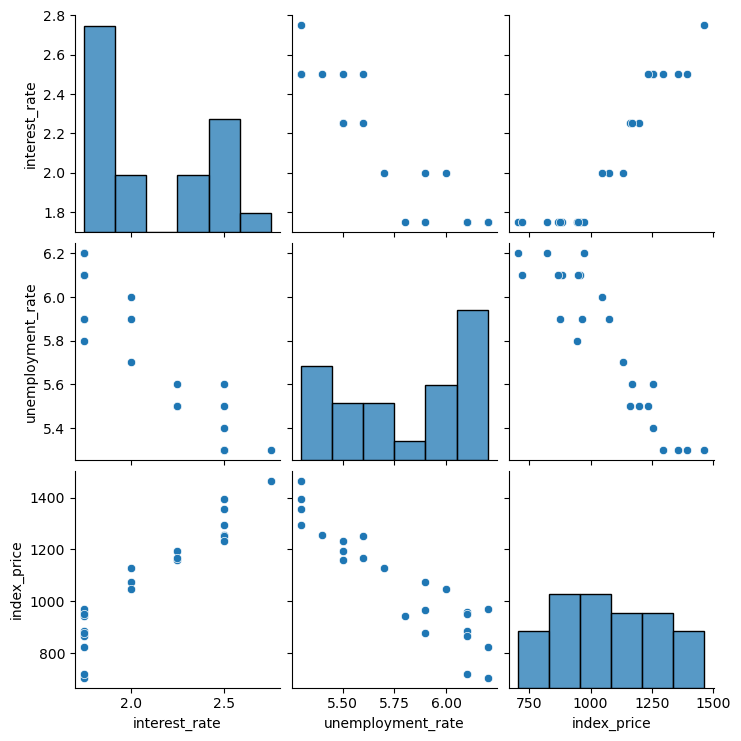

In [31]:
#Lets do some visualization
import seaborn as sns 
sns.pairplot(df_index)

In [32]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

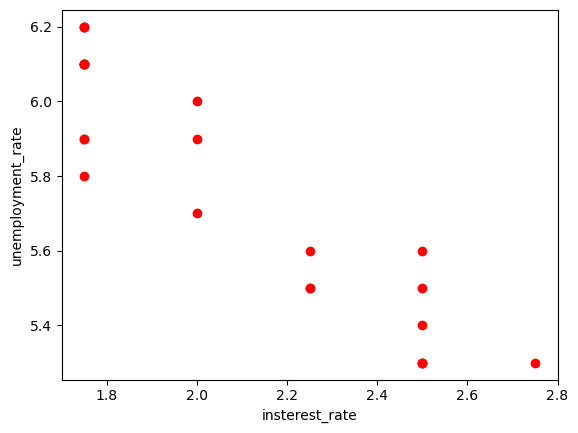

In [33]:
# visualize the data points more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel('insterest_rate')
plt.ylabel('unemployment_rate')


In [34]:
## independent and dependent features 
"""iloc function is from pandas used for index based selection"""
X=df_index.iloc[:,:-1]  #[Start_of_row:end_of_rows , start_of_column : end of colymn]
Y=df_index.iloc[:,-1]

In [35]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [36]:
Y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [37]:
# train test split
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [38]:
import seaborn as sns


The seaborn.regplot() function is used for scatter plots with a regression line. Unlike a simple scatter plot, regplot() automatically fits a linear regression model to your data and displays the best-fit line along with a confidence interval

<Axes: xlabel='interest_rate', ylabel='index_price'>

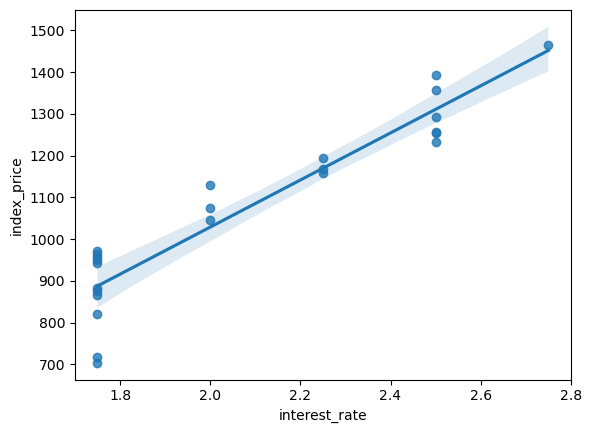

In [39]:
# regression plot  
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

In [40]:
from sklearn.preprocessing import StandardScaler

StandardScaler() transforms your data so that:

The mean of each feature = 0
The standard deviation of each feature = 1
Mathematically, for each value to N(0,1)


In [41]:
scaler = StandardScaler()   # it id 
X_train= scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [42]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [43]:
from sklearn.linear_model  import LinearRegression

C

In [44]:
regression = LinearRegression()  #it: ✅ Creates an empty regression model
regression.fit(X_train,Y_train)

LinearRegression()

The cross_val_score function in Scikit-learn is used to evaluate the performance of a machine learning model using cross-validation.  
 Here's how it works and how you can use it:  
Functionality: It splits the dataset into multiple subsets   (folds), trains the model on each training subset, and tests it on the corresponding testing subset. It returns the   evaluation metric (such as accuracy) for each fold.  
Parameters:   
estimator: The machine learning model to evaluate.  
X: The feature matrix (input data).  
y: The target vector (output labels).  
cv: The number of folds or a cross-validation generator.  
scoring: The scoring method to evaluate the model. By   default, it uses the score method of the estimator.  


In [45]:
# cross_validation
from sklearn.model_selection import cross_val_score
validation_score =cross_val_score(regression,X_train,Y_train,scoring="neg_mean_squared_error",cv=3)


#### what does cv=3 mean?
Splits X_train and Y_train into 3 equal parts (folds).  
Trains the model 3 times, each time:    
Uses 2 folds for training.    
Uses 1 fold for validation (rotating each time).     
Returns 3 different scores (one for each fold).   
Why Use Cross-Validation?  
✅ More Reliable Model Evaluation: It tests the model on different subsets of data. 
✅ Prevents Overfitting: Ensures the model generalizes well to new data.  
✅ Reduces Bias from a Single Train-Test Split.  



In [46]:
validation_score   #it is providing negative_mean_squared _error for each fold

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [48]:
np.mean(validation_score)

-5914.828180162388

In [49]:
y_pred = regression.predict(X_test)

In [50]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [51]:
# performance metrices
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [53]:
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse =np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [54]:
from sklearn.metrics import r2_score

In [55]:
score = r2_score(Y_test,y_pred)
print(score)

0.7591371539010257


In [56]:
# Adjusted R^2

In [60]:
1 - (1 - score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.5985619231683761

This scatter plot is typically used to visualize the performance of a regression model.   
If the predictions are perfect, all points should lie on a 45-degree diagonal line (i.e., y = x).  
The closer the points are to this diagonal, the better the model's predictions.
Deviation from the diagonal indicates prediction errors.  
Possible Insights from the Graph:  
Perfect Fit: If all points are on a straight diagonal line, the model is making   perfect predictions.  
Overfitting/Underfitting: If there is a systematic deviation (e.g., all points   above or below the line), the model may be biased.  
Variance of Predictions: If the points are widely scattered, the model has high   variance and is making inconsistent predictions.  
Outliers: Points far from the diagonal indicate that the model failed to predict   those values accurately.  

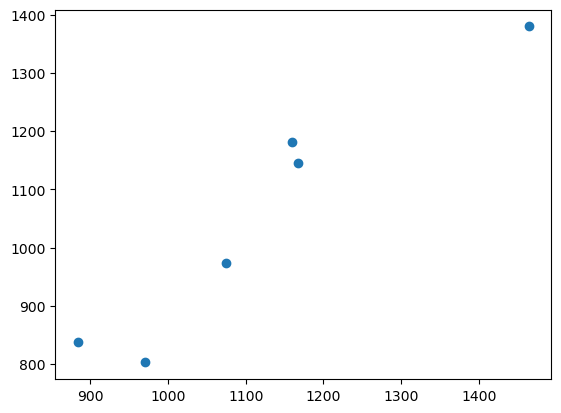

In [61]:
# Assumptions
plt.scatter(Y_test,y_pred)

<Axes: xlabel='index_price'>

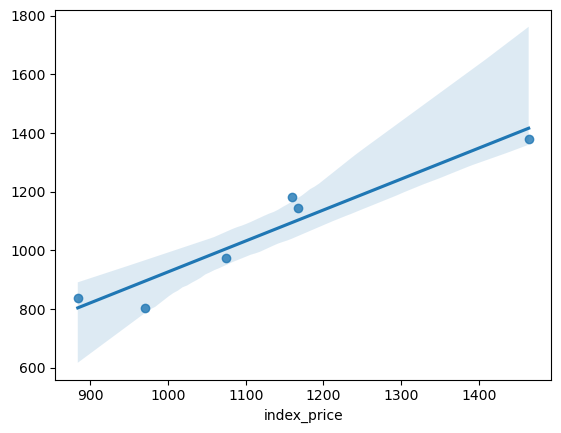

In [67]:
sns.regplot(x=Y_test,y=y_pred)

In [65]:
residuals =Y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


c:\Users\sahil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


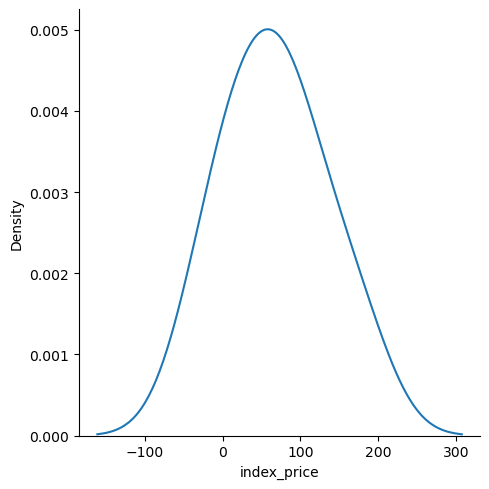

In [66]:
## plot this reiduals 
sns.displot(residuals,kind="kde")

Model Errors are Normally Distributed (Good Sign)  
This suggests that the model's errors (difference between actual and predicted   
values) are random and unbiased.  
It aligns with the assumption of homoscedasticity (constant variance of errors) in   regression models.  
2. No Systematic Bias in Predictions  
A normal distribution of residuals means the model does not consistently   overpredict or underpredict for any range of the data.  
The mean of residuals should be close to zero, meaning predictions are accurate on average.  
3. Model Likely Follows Linear Assumptions  
If you're using linear regression, normally distributed residuals indicate that   the assumptions of ordinary least squares (OLS) regression are likely valid.  
4. Suitable for Hypothesis Testing  
Many statistical tests (like t-tests, F-tests) assume normally distributed   residuals.  
If residuals are normally distributed, the p-values and confidence intervals from these tests are reliable.  

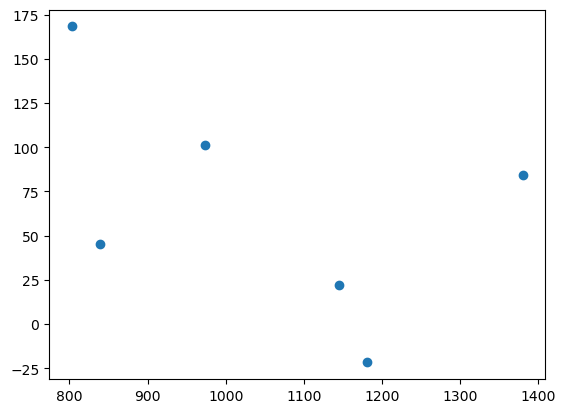

In [68]:
# scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [ ]:
# from this 

In [69]:
# OLS Linear Regression 
import statsmodels.api as sm
model =sm.OLS(Y_train,X_train).fit()

In [71]:
model.summary()


c:\Users\sahil\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Tue, 04 Feb 2025   Prob (F-statistic):                       0.754
Time:                        10:18:05   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""